In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Fundamentos de desulfuración de aceros

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## Contexto metalúrgico

De forma general, el azufre es considerado como un elemento que puede ser nocivo para el acero, por lo que es necesario controlarlo a lo largo del proceso de elaboración de acero.


Este documento se enfoca en mostrar algunos conceptos básicos de desulfuración de aceros, y la aplicación de los mismos en el proceso de refinación secundaria de aceros.

## Capacidad de sulfuro, Cs.

La capacidad de sulfuro, $C_s$, es un concepto utilizado ampliamente en pirometalurgia, y que define la capacidad de una escoria fundida homogenea para remover el azufre durante una operación de refinación.

Se considera que la capacidad de sulfuro es una propiedad única de cada escoria, y que depende de la composición química y la temperatura. En la literatura existen varios modelos que permiten estimarla en función de estos parámetros.

El concepto de capacidad de sulfuro permite comparar bajo el mismo marco de trabajo la capacidad de desulfuración de distintas escorias.

### Mediciones de contenido de azufre en equilibrio en una escoria

La capacidad de una escoria para disolver azufre, $S^{2-}$, se determina mediante experimentos de equilibrio entre una escoria fundida y una mezcla gaseosa oxígeno-azufre a una temperatura fija. La reacción de equilibrio estudiada es:

$$ \frac{1}{2} S_2(g) + \left(O^{2-}\right)_{slag} = \frac{1}{2} O_2(g) + \left(S^{2-}\right)_{slag} \quad\quad Reac. 1$$

$$ K_1 = \underbrace{\frac{a_{S^{2-}}}{a_{O^{2-}}}}_{no \,medible} \,\,\underbrace{\left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}}_{medible}$$

donde $a_{S^{2-}}$ y $a_{O^{2-}}$, son las actividades de los iones de azufre y oxígeno en la escoria (no medibles). $p_{S_2}$ y $p_{O_2}$, son las presiones parciales de oxígeno y azufre en la mezcla gaseosa (medibles).

### Definición de la capacidad de sulfuro

La capacidad de azufre, definida por [Finchan & Richardson](https://royalsocietypublishing.org/doi/10.1098/rspa.1954.0099), se obtiene al reacomodar los términos en la constante de equilibrio de la Reacción 1, de tal forma que esta se pueda estimar a partir de variables medibles.

$$ C_S = \underbrace{K_1 \frac{a_{O^{2-}}}{f_{S^{2-}}}}_{no \, medible} = \underbrace{\left(\%S\right)_{slag} \left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}}_{medible} $$

La actividad del ión sulfuro está dada por: $a_{S^{2-}} = f_{S^{2-}} \left(\%S\right)_{slag}$.

## Capacidad de sulfuro modificada, Cs'.

La capacidad de sulfuro modificada, $C_S'$, es una extensión del concepto de capacidad de sulfuro, que permite aplicar este concepto de forma directa para el caso de refinación de metales y aleaciones fundidas (en este caso, aceros).

### Reacción de intercambio de azufre entre el metal y la escoria



El intercambio de azufre entre metal y escoria está piloteado por una reacción iónica en la interface entre el metal y la escoria:

$$ \left[ S \right] + \left( O^{2-} \right) = \left( S^{2-} \right) + \left[ O \right] \quad \quad Reac. 2$$ 

$$ K_2 = \underbrace{\frac{ \left( a_{S^{2-}}\right) }{ \left( a_{O^{2-}}\right)  }}_{no \, medible} \,\, \underbrace{\frac{\left[h_O\right] }{\left[h_S\right]}}_{medible}$$

### Definición de la capacidad de sulfuros modificada



Se obtiene al reacomodar los términos en la constante de equilibrio de la Reacción 2, de tal forma que esta se pueda estimar a partir de variables medibles.

$$ C_S' = \underbrace{K_2 \frac{a_{O^{2-}}}{f_{S^{2-}}}}_{no \, medible} = \underbrace{\left(\%S\right) \frac{\left[h_O\right]}{\left[h_S\right]}}_{medible} $$

La actividad del ión sulfuro en la escoria está dada por: $a_{S^{2-}} = f_{S^{2-}} \left(\%S\right)_{slag}$. 

Las actividades de azufre y oxígeno en el metal están dadas por: $h_S = f_S [\%S]$, $h_O = f_O [\%O]$.

## Relación entre Cs y Cs'

Para poder utilizar el concepto de capacidad de sulfuro y determinar el poder desulfurante de una escoria en caso de aplicación de de refinación de metales, es necesario encontrar la relación que existe entre $C_S$, que se determinó mediante experimentos de equilibrio de escorias fundidas con una mezcla de gases; y $C_S'$, que representa las condiciones de procesamiento del metal.

### Conversión de la relación oxígeno/azufre, de cociente de presiones a cociente de actividades en el metal



La reacción combinada de disolución de oxígeno y azufre en el baño esta dada por:

$$\left[S\right] + \frac{1}{2} \left\{O_2\right\} = \frac{1}{2} \left\{S_2\right\} + \left[O\right] \quad \quad Reac. 3$$

$$K_3 = \frac{\left[h_o\right]}{\left[h_s\right]} \left(\frac{p_{S_2}}{p_{O_2}}\right)^{1/2}$$

Al reacomodar los términos se obtiene una expresión para el cociente de actividades de oxígeno y azufre en el metal:


$$\frac{\left[h_o\right]}{\left[h_s\right]}  = K_3 \left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}$$

Sustituyendo la expresión para $h_O/h_S$ en la definición de $C_S'$, se tiene:

$$ C_S' = \underbrace{\left(\%S\right)  \left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}}_{C_S} K_3$$

De acuerdo con [Andersson, Jönsson & Nzotta](https://www.jstage.jst.go.jp/article/isijinternational1989/39/11/39_11_1140/_pdf), el valor de la constante de equilibrio para la reacción tiene el valor:

$$\log K_3 = -\frac{935}{T} + 1.375$$

In [2]:
def logK3(T:float) -> float:
    """
    log Equilibrium constant for sulfur-oxygen 
    dissolution reaction (Reac. 3)

    Parameters
    ----------
    T : Float
        Temperature, in [K].
        
    Returns
    -------
        Float
        logarithm base 10 of equilibrium constant for Reac. 3
    """
    return -935.0/T + 1.375

### Cociente entre Cs' y Cs



Utilizando los datos termodinánicos para la Reacción 3, definidos en la función `logK3()`, se produce el gráfico debajo, que muestra el valor del cociente para un rango de temperatura entre $1300 \, ^\circ C$ y $1600 \, ^\circ C$.

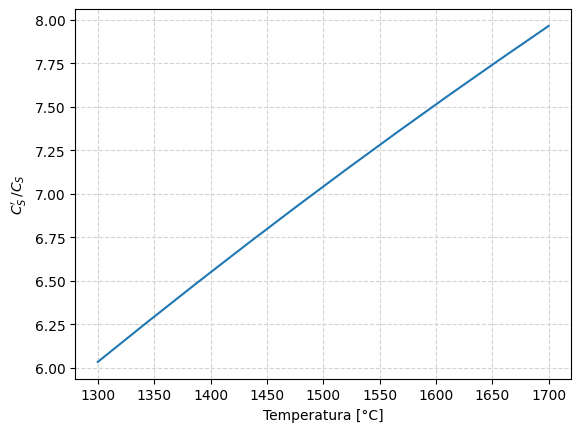

In [3]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)

Tc0 = np.linspace(1300, 1700, 10)
Tk0 = Tc0 + 273.15

# Plot lines
ratioISIJ0 = np.power(10, logK3(Tk0))
ax0.plot(Tc0, ratioISIJ0)

ax0.set_xlabel("Temperatura [°C]")
ax0.set_ylabel(r"$C_S' \, / C_S$")

ax0.grid(ls='--', color='lightgray')

plt.show()

## Coeficiente de reparto de azufre, Ls

El coeficiente de reparto de azufre, $L_S$, representa el cociente entre el azufre contenido en la escoria y el azufre contenido en el metal, bajo condiciones de equilibrio termodinánico.


$$L_S = \frac{(\%S)}{[\%S]} \quad \quad Equilibrio$$

Dado que las mediciones de contenido de azufre en el metal y en la escoria son relativamente fáciles de analizar en planta, es común que se evalúe este indicador durante el proceso de aceración. Sin embargo hay que considerar que el proceso de refinación es transitorio, y que las condiciones del proceso pueden estar fuera del equilibrio al momento de tomar las muestras.


$$L_{S_{(planta)}} = \frac{(\%S)}{[\%S]} \quad \quad Fuera \, del \, equilibrio$$

### Relacion entre el coeficiente de reparto y la capacidad de azufre



Partiendo de la definición de capacidad de sulfuro modificada, y con la actividad de azufre en el metal dada por, $h_S = f_S [\%S]$, se tiene:

$$ C_S' =  \frac{(\%S)}{[\%S]} \frac{h_O}{f_S} = L_S \frac{h_O}{f_S}$$

Aplicando logaritmos y reordenando se obtiene una forma más útil de la ecuación para aplicaciones prácticas:

$$\log L_S = \log C_S' + \log f_S - \log h_O$$

También se puede escribir en términos de la capacidad de azufre, $C_S$, que son el tipo de datos que generalmente están disponibles en la literatura o en modelos:

$$\log L_S = \log C_S -\frac{935}{T} + 1.375 + \log f_S - \log h_O$$

In [4]:
def logLs(Cs: float, T: float, fs: float, ho:float) -> float:
    """ 
    log of Sulfur partition coefficient Ls
        Ls = (%S)/[%S]

    Parameters
    ----------
    Cs: Float
        Sulfide capacity of the slag, in [wt%]
    T : Float
        Temperature, in [K].
    fs: Float
        Henrian activity coefficient, for sulfur
    ho: Float
        Henrian activity, for oxygen [wt%]
    
    Returns
    -------
        Float
        logarithm base 10 of sulfur partition coefficient
    """
    return np.log10(Cs) + logK3(T) + np.log10(fs) - np.log10(ho)

### Implicaciones metalúrgicas



La ecuación mostrada permite evidenciar algunas estrategias a seguir para maximizar el coeficiente de reparto de azufre:

1. Ajuste de la escoria y la temperatura, para obtener en la escoria una buena capacidad de sulfuros, $C_S$.
2. Desoxidación del baño, para disminuir la actividad de oxígeno en el metal, $h_O$.

Estas se pueden ver al estudiar la función `logLs()`, definida debajo, y que se grafica debajo para distintas capacidades de azufre, $C_S$ y actividades de oxígeno, $h_O$, manteniendo fijas la temperatura $(T = 1600 ^\circ C$), y el coeficiente de actividad henriana del azufre $(f_S = 1)$.

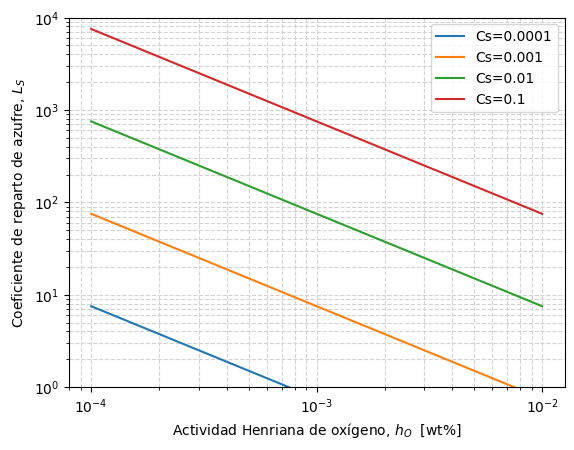

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

_ao = np.logspace(-4, -2, 10)
_T1 = 1873.15 # 1600 C
_fs = 1

# Plot lines
_CS = np.array([1e-4, 1e-3, 1e-2, 1e-1])

for Cs in _CS:
    _Lsline = np.power(10, logLs(Cs, _T1, _fs, _ao))
    label = "".join(["Cs=", str(Cs)])
    ax1.plot(_ao, _Lsline, label=label)

# Format graph
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1, 1e4)

ax1.set_xlabel(r"Actividad Henriana de oxígeno, $h_O$  [wt%]")
ax1.set_ylabel(r"Coeficiente de reparto de azufre, $L_S$")


ax1.grid(ls='--', which='both', color='lightgray')
ax1.legend()

plt.show()

## Efecto de la masa de escoria

Una vez que se han identificado el impacto metalúrgico del buen acondicionamiento de la escoria $(C_S)$ y las condiciones de desoxidación del baño $(h_O)$, se debe de cuantificar el impacto de la cantidad de escoria, $M_{sl}$, utilizada en el proceso de refinación. El primer paso para hacerlo es efectuar un balance de masa para el azufre en la escoria y el metal.

### Balance de azufre

El balance de masa de azufre en la escoria y el metal, normalizado para 1000 kg (1 tonelada) de acero está dado por:

$$\underbrace{1000 \left[\omega_S\right]_0 + M_{sl} \left(\omega_S\right)_0}_{estado \, inicial} = \underbrace{1000 \left[\omega_S\right] + M_{sl} \left(\omega_S\right)}_{estado \, final} $$

donde $M_{sl}$ es la masa de escoria en kg por tonelada de acero, $[\omega_S]$ es la fracción másica de azufre en la escoria, y $(\omega_S)$ es la fracción másica de azufre en el metal.

Una simplificación común en la ecuación consiste en ignorar el contenido de azufre en la escoria inicial:

$$\underbrace{1000 \left[\omega_S\right]_0}_{estado \, inicial} = \underbrace{1000 \left[\omega_S\right] + M_{sl} \left(\omega_S\right)}_{estado \, final} $$

### Balance en términos del coeficiente de reparto y la masa de escoria

Con un poco de manipulación algebráica se puede reescribir el balance en términos del coeficiente de reparto, $L_S$:

$$1000 \frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} = 1000 + M_{sl} \underbrace{\frac{\left(\omega_S\right)}{\left[\omega_S\right]}}_{L_S} $$


$$\frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} = 1 + \frac{M_{sl}}{1000} L_S $$

Esta función permite evaluar el contenido de azufre una vez que el equilibrio metal-escoria se ha alcanzado, es decir, el límite termodinámico para el proceso de desulfuración.

**Cociente de los contenidos de azufre en equilibrio y azufre inicial en el metal:**

$$\frac{\left[\omega_S \right]}{\left[\omega_S\right]_0} = \frac{1}{1 + \frac{M_{sl}}{1000} L_S} $$

**Porcentaje de desulfuración en el metal al alcanzar el equilibrio:**

$$R_S =  \left(1 - \frac{[\omega_S]}{[\omega_S]_0} \right) \times 100 \%$$


In [6]:
def desulfRatio(Msl: float, Ls: float) -> float:
    """ 
    Ratio of equilibrium and initial sulfur contents in the metal
    as given by a sulfur mass balance.
    
    Parameters
    ----------
    Msl: Float
         kg of molten slag per ton of metal, [kg/ton]
    Ls : Float
         Sulfur partition coefficient, Ls=(%S)/[%S]
    Returns
    -------
        Float
        Ratio of equilibrium and initial sulfur contents in the metal
    """
    return 1 / (1 + (Msl/1000) * Ls)

### Implicaciones metalúrgicas

La ecuación mostrada permite obtener estimaciones del nivel máximo de desulfuración posible en un proceso (límite termodinámico) para el cuál se conoce la masa de escoria utilizada, $M_{sl}$, y el coeficiente de reparto de azufre, $L_S$.

Estas estimaciones se pueden ver al estudiar la función `desulfRatio()`, y que se grafica para distintos valores de masas de escoria, $M_{sl}$ y coeficientes de reparto de azufre, $L_S$.

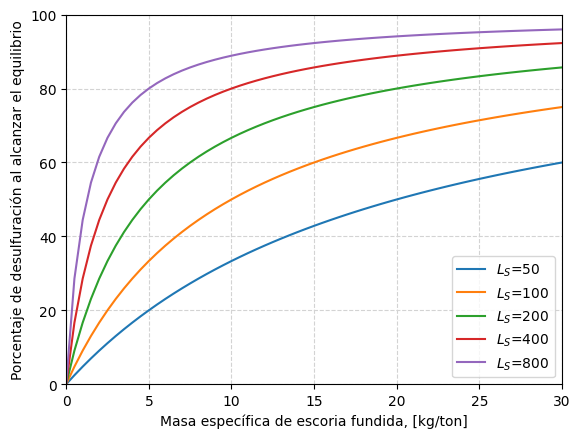

In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

_Msl2 = np.linspace(0, 30, 61)

# Plot lines
_Ls2 = np.array([50, 100, 200, 400, 800])

for Ls in _Ls2:
    _pctDesulf = 100 * (1 - desulfRatio(_Msl2, Ls))
    label = "".join([r"$L_S$=", str(Ls)])
    ax2.plot(_Msl2, _pctDesulf, label=label)

# Format graph
ax2.set_ylim(1, 1e4)

ax2.set_xlabel(r"Masa específica de escoria fundida, [kg/ton]")
ax2.set_xlim(0, 30)
ax2.set_ylabel(r"Porcentaje de desulfuración al alcanzar el equilibrio")
ax2.set_ylim(0, 100)

ax2.grid(ls='--', which='both', color='lightgray')
ax2.legend(loc='lower right')

plt.show()

A partir de la ecuación del cociente de contenidos de azufre, se pueden crear superficies de respuesta que indican la masa de escoria requerida, $M_{sl}$, para obtener un contenido de azufre al equilibrio dado, $[\omega_S]$, a partir de un contenido de azufre inicial, $[\omega_S]_0$, y un coeficiente de reparto de azufre dado, $L_S$.

Este cálculo se implementa en la función `plot_Msl_surf()`, que permite producir la gráfica que se muestra debajo.

In [8]:
def Msl_surf(Sini: float, Sfin: float, Ls: float) -> float:
    """
    Masa de escoria [kg/ton] requerida para remocion de azufre
        Sini: Azufre inicial
        Sfin: Azufre final (equilibrio)
        Ls: coeficiente de reparto de azufre
    """
    return 1000/Ls * (Sini/Sfin - 1)

def plot_Msl_surf(Ls:float)->None:
    """
    Grafica la superficie de respuesta de masa de escoria
    requerida para obtener un nivel de azufre en equilibrio
    a partir de un contenido de azufre inicial.
    """
    _Sini = np.linspace(50, 500, 80)
    _Sfin = np.linspace(1, 200, 80)

    X, Y = np.meshgrid(_Sini, _Sfin)
    Z = Msl_surf(X, Y, Ls)

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)

    CS3 = ax3.contourf(X, Y, Z, levels=[0, 5, 10, 15, 20, 25, 30])
    cbar3 = fig3.colorbar(CS3, ax=ax3)
    
    ax3.set_xlabel("ppm S (inicial)")
    ax3.set_ylabel("ppm S (equilibrio)")
    
    cbar3.ax.set_ylabel(r'Masa de escoria $M_{sl}$, [kg/ton]')
    
    plt.show()

**Se invita al utilizador a experimentar cambiando el valor del coeficiente de reparto de azufre en la función `plot_Msl_surf()`**


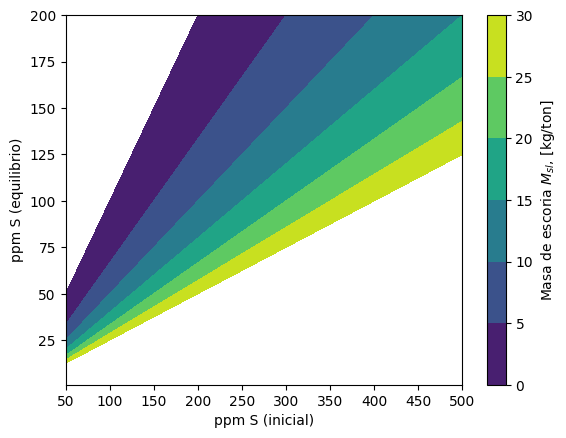

In [9]:
plot_Msl_surf(Ls = 100)

## Cálculo de la tasa de desulfuración

Como ya se mencionón, el proceso de desulfuración está pilotado por la transferencia de azufre en la interface metal-escoria.

$$ \left[ S \right] + \left( O^{2-} \right) = \left( S^{2-} \right) + \left[ O \right] \quad \quad Reac. 2$$ 

Este tipo de procesos se pueden describir mediante una ecuación diferencial de primer orden.

### Ecuación diferencial de la tasa de desulfuración

La ecuación de diferencial de primer orden que se muestra debajo, permite estimar el progreso de la desulfuración de un baño de acero, considerando que al mismo tiempo que el azufre es removido del metal, el contenido de azufre en la escoria aumenta.


$$\frac{d[\%S]}{dt} = -k_{S,emp} \left([\%S] \left(1 + \frac{1}{\frac{M_{sl}}{1000} L_s} \right) - \frac{[\%S_0]}{\frac{M_{sl}}{1000} L_s}\right) $$


Donde:

- $k_{S, emp}$: constante de desulfuración empírica que caracteriza el nivel de agitación en el baño y la extensión del área de contacto entre el metal y la escoria

- $[\%S]$: contenido de azufre en el metal.

- $[\%S_0]$: contenido de azufre inicial.

- $M_{sl}$: masa de escoria, en kg/ton.

- $L_S$: coeficiente de reparto de azufre.

In [10]:
def desulfRate(t:float, wS:float, c:float) -> float:
    """
    Desulfurization rate differential equation
    taking into account uptake of sulfur by the slag
    
    Parameters
    ----------
    t : Float
        time, in [s]
    wS: Float
        sulfur content, in [wt%]
    c:  tupple with Floats
        ks: desulfurization rate constant, in [1/s]
        ws0: initial sulfur content in metal, in [wt%]
        Msl: kg of slag per ton of metal, in [kg/ton]
        Ls: sulfur partition coeficient, Ls=(%S)/[%S]
    Returns
    -------
    dwSdt : float
        Desulfurization rate, in [[%S]/s]
    """
    ks, wS0, Msl, Ls = c
    Y = Msl/1000 * Ls
    dwSdt = -ks * (wS * (1 + 1/Y) - wS0/Y)
    return dwSdt

### Resolución numérica de la ecuación diferencial

Debajo se presenta un método para la resolución de la ecuación diferencial planteada en la función `desulfRate()`, utilizando la función función `solve_ivp()`, incluida en la librería `scipy.integrate`.

Se utiliza la función `plot_desulfRate()` para graficar los resultados obtenidos tras la integración numérica de la ecuación.

In [11]:
def plot_desulfRate(sol):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    t = sol.t/60 # tiempo,[min]
    wS = sol.y[0] # azufre al tiempo t, [wt%]
    
    ax.plot(t, wS)
    ax.set_xlabel("tiempo de refinación [min]")
    ax.set_ylabel("Contenido de azufre en el metal [wt%]")
    
    ax.grid(ls='--', color='lightgray')

**Se invita al utilizador a experimentar para evaluar el efecto de los distintos parametros.**

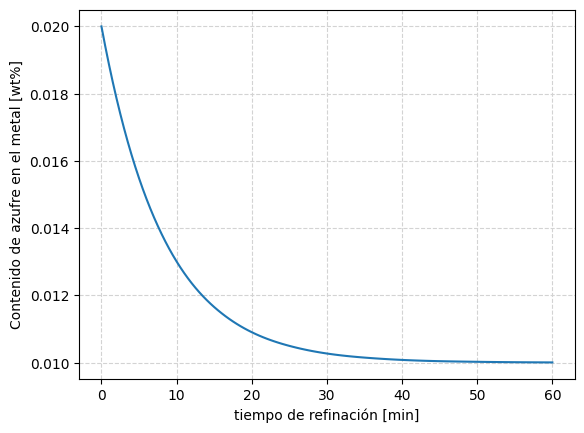

In [12]:
# definir tiempos para integración y constantes
teval = np.linspace(0, 3600, 121)
ks = 1e-3 # constante de desulfuración, [1/s]
wS0 = 0.020 #valor inicial de azufre, [wt%]
Msl = 20 # masa de escoria, kg/ton
Ls = 50 # coeficiente de reparto

# entrada para el resolvedor
tspan = (teval[0], teval[-1])
c = [ks, wS0, Msl, Ls]

# resolver la ecuacion diferencial
sol = solve_ivp((lambda t, wS: desulfRate(t, wS, c)), t_span=tspan, y0 = [wS0], t_eval=teval)

# graficar el resultado
plot_desulfRate(sol)

## Referencias

[Finchan, C. J. & Richardson F. D (1954)](https://doi.org/10.1098/rspa.1954.0099)  
The behaviour of sulphur in silicate and aluminate melts  
Proceedings of the Royal Society London A22340–62

[Slag Atlas (1995)](https://www.stahleisen.de/product/slag-atlas/)  
ed. by VDEh. Verlag Stahleisen GmbH, Düsseldorf.

[The Making, Shaping and Treating of Steel: Steelmaking and Refining Volume (1998)](https://imis.aist.org/store/detail.aspx?id=PB-332)  
ed. by R. J. Fruehan, Association of Iron and Steel Engineers.

[Andersson, M.A., Jönsson, P. G., & Nzotta, M. M. (1999)](https://www.jstage.jst.go.jp/article/isijinternational1989/39/11/39_11_1140/_pdf)  
Application of the sulphide capacity concept on high-basicity ladle slags used in bearing-steel production.  
ISIJ international, 39(11), 1140-1149.

[Secondary Steelmaking: Principles and Applications (2000)](https://doi.org/10.1201/9781420042313)  
GHOSH, Ahindra.
CRC Press.